<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дерево решений</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

**Признаки:**

RowNumber — индекс строки в данных

СustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

**Целевой признак**

Exited — факт ухода клиента

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
import warnings
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv('/datasets/Churn.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Есть пропуски в столбце Tenure, заполним их.

Также названия столбцов нужно исправить.

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data = data.rename(columns={'rownumber':'row_number','customerid':'customer_id','creditscore':'credit_score', 'numofproducts':'num_of_products', 'hascrcard':'has_cr_card', 'isactivemember':'is_active_member', 'estimatedsalary':'estimated_salary'})

In [ ]:
data['tenure']= data['tenure'].fillna(0)

In [ ]:
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
# Удаляем ненужные столбцы
data.drop(['row_number', 'customer_id', 'surname'], axis=1, inplace=True)

## Исследование задачи

Разделим датасет на обучающую, валидационную и тестовую выборку в пропорции 3:1:1

In [ ]:
# Создадим список категориальных входных признаков
categorical = ['geography', 'gender']

# Кодируем категориальные признаки
data_ohe = pd.get_dummies(data, columns=categorical, drop_first=True)

In [ ]:
train, test = train_test_split(data_ohe, test_size=0.2, random_state=4444, stratify=data['exited'])

In [ ]:
train.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geography_Germany', 'geography_Spain', 'gender_Male'],
      dtype='object')

In [ ]:
target = train['exited']
features = train.drop(['exited'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features,
                                target, test_size=0.2, random_state=4444, stratify=target)

In [ ]:
numeric_column = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 
                 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric_column])

features_train[numeric_column] = scaler.transform(features_train[numeric_column])
features_valid[numeric_column] = scaler.transform(features_valid[numeric_column])

In [ ]:
model_score = pd.DataFrame(columns=['model_name', 'f1', 'auc_roc'])


def print_and_add(df, name, f1, auc_roc): # вывод показателей и запись их в таблицу
    print('best F1: {:.3f}'.format(f1))
    print('best AUC-ROC: {:.3f}'.format(auc_roc))
    return df.append({'model_name' : name, 'f1': f1, 'auc_roc': auc_roc},
                              ignore_index=True)

### Логистическая регрессия

In [ ]:
best_c = 0
best_auc_roc = 0
best_f1 = 0

for c in np.arange(0.03, 0.045, 0.001):
    model = LogisticRegression(random_state=4444, C=c, solver='liblinear')
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1:
        best_f1 = f1
        best_c = c
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        best_auc_roc = roc_auc_score(target_valid, probabilities_one)
print('best C: {:.2f}'.format(best_c))        
model_score = print_and_add(model_score, 'LogisticRegression', best_f1, best_auc_roc)

best C: 0.03
best F1: 0.288
best AUC-ROC: 0.777


### Случайный лес

In [ ]:
best_f1 = 0
best_depth = 0
best_auc_roc = 0
best_est = 0

for est in range(157, 160):    
    for depth in range(12,15):    
        model = RandomForestClassifier(random_state=4444, max_depth=depth, n_estimators=est)
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted) 
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est
            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:,1]
            best_auc_roc = roc_auc_score(target_valid, probabilities_one) 
print('best depth:', best_depth)
print('best n_estimators:', est)
model_score = print_and_add(model_score, 'RandomForestClassifier', best_f1, best_auc_roc)

best depth: 14
best n_estimators: 159
best F1: 0.604
best AUC-ROC: 0.866


### Дерево решений

In [ ]:
best_f1 = 0
best_depth = 0
best_auc_roc = 0
for depth in range(11,15):    
    model = DecisionTreeClassifier(random_state=4444, max_depth=depth)
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted) 
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        best_auc_roc = roc_auc_score(target_valid, probabilities_one) 
print('best depth:', depth)

model_score = print_and_add(model_score, 'DecisionTreeClassifier', best_f1, best_auc_roc)

best depth: 14
best F1: 0.544
best AUC-ROC: 0.774


(array([0, 1, 2]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'DecisionTreeClassifier')])

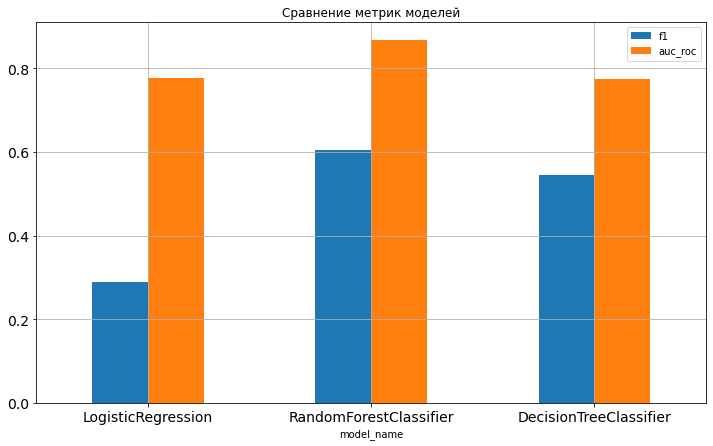

In [ ]:
model_score.plot(x='model_name', kind='bar', figsize=(12,7), fontsize=14, grid=True,
                 title='Сравнение метрик моделей' )
plt.xticks(rotation=0)

Выявили дисбаланс классов целевого признака. С помощью модели логической регрессии, случайного леса и дерева решений получили значения F1-меры 0.29, 0.60 и 0,54 соответственно. Для того, чтобы модель пресказывала эти классы точнее - учтём дисбаланс классов.

## Борьба с дисбалансом

In [ ]:
balanced_model_score = pd.DataFrame(columns=['model_name', 'f1', 'auc_roc'])

In [ ]:
best_c = 0
best_auc_roc = 0
best_f1 = 0

for c in np.arange(0.03, 0.05, 0.001):
    model = LogisticRegression(random_state=4444, C=c, solver='liblinear',
                               class_weight='balanced')
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1:
        best_f1 = f1
        best_c = c
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        best_auc_roc = roc_auc_score(target_valid, probabilities_one)
print('best C:', best_c)        
balanced_model_score = print_and_add(balanced_model_score, 'LogisticRegression',
                                     best_f1, best_auc_roc)

best C: 0.032
best F1: 0.513
best AUC-ROC: 0.783


In [ ]:
best_f1 = 0
best_depth = 0
best_auc_roc = 0
for depth in range(8,15):    
    model = DecisionTreeClassifier(random_state=4444, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted) 
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        best_auc_roc = roc_auc_score(target_valid, probabilities_one) 
print('best depth:', depth)

balanced_model_score = print_and_add(balanced_model_score, 'DecisionTreeClassifier',
                                     best_f1, best_auc_roc)

best depth: 14
best F1: 0.586
best AUC-ROC: 0.770


In [ ]:
best_f1 = 0
best_depth = 0
best_auc_roc = 0
best_est = 0

for est in range(155, 160):    
    for depth in range(5,13):    
        model = RandomForestClassifier(random_state=4444, max_depth=depth, n_estimators=est,
                                       class_weight='balanced')
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted) 
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est
            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:,1]
            best_auc_roc = roc_auc_score(target_valid, probabilities_one) 
print('best depth:', best_depth)
print('best n_estimators:', est)
balanced_model_score = print_and_add(balanced_model_score, 'RandomForestClassifier',
                                     best_f1, best_auc_roc)

best depth: 10
best n_estimators: 159
best F1: 0.650
best AUC-ROC: 0.871


(array([0, 1, 2]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'RandomForestClassifier')])

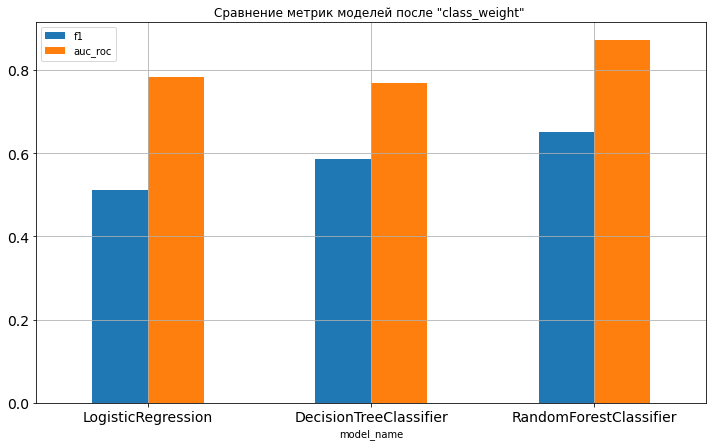

In [ ]:
balanced_model_score.plot(x='model_name', kind='bar', figsize=(12,7), fontsize=14, grid=True,
                          title='Сравнение метрик моделей после "class_weight" ' )
plt.xticks(rotation=0)

увеличим в 4 раза объекты редкого класса

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle( features_upsampled, target_upsampled,
                                                   random_state=4444)
    return features_upsampled, target_upsampled

In [ ]:
features_train, target_train = upsample(features_train, target_train, 4)
target_train.value_counts(normalize=True)

1    0.505818
0    0.494182
Name: exited, dtype: float64

In [ ]:
upsample_model_score = pd.DataFrame(columns=['model_name', 'f1', 'auc_roc'])

In [ ]:
best_c = 0
best_auc_roc = 0
best_f1 = 0

for c in np.arange(0.03, 0.05, 0.001):
    model = LogisticRegression(random_state=4444, C=c, solver='liblinear')
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1:
        best_f1 = f1
        best_c = c
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        best_auc_roc = roc_auc_score(target_valid, probabilities_one)
print('best C:', best_c)        
upsample_model_score = print_and_add(upsample_model_score, 'LogisticRegression',
                                     best_f1, best_auc_roc)

best C: 0.034
best F1: 0.505
best AUC-ROC: 0.783


In [ ]:
best_f1 = 0
best_depth = 0
best_auc_roc = 0
for depth in range(8,15):    
    model = DecisionTreeClassifier(random_state=4444, max_depth=depth)
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted) 
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        best_auc_roc = roc_auc_score(target_valid, probabilities_one) 
print('best depth:', depth)

upsample_model_score = print_and_add(upsample_model_score, 'DecisionTreeClassifier',
                                     best_f1, best_auc_roc)

best depth: 14
best F1: 0.587
best AUC-ROC: 0.766


In [ ]:
best_f1 = 0
best_depth = 0
best_auc_roc = 0
best_est = 0

for est in range(155, 160):    
    for depth in range(5,13):    
        model = RandomForestClassifier(random_state=4444, max_depth=depth, n_estimators=est)
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted) 
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est
            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:,1]
            best_auc_roc = roc_auc_score(target_valid, probabilities_one) 
print('best depth:', best_depth)
print('best n_estimators:', est)
upsample_model_score = print_and_add(upsample_model_score, 'RandomForestClassifier',
                                     best_f1, best_auc_roc)

best depth: 11
best n_estimators: 159
best F1: 0.655
best AUC-ROC: 0.871


(array([0, 1, 2]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'RandomForestClassifier')])

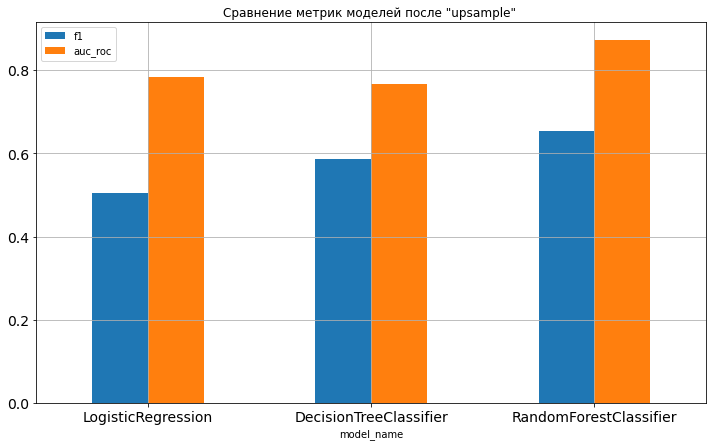

In [ ]:
upsample_model_score.plot(x='model_name', kind='bar', figsize=(12,7), fontsize=14, grid=True,
                          title='Сравнение метрик моделей после "upsample" ' )
plt.xticks(rotation=0)

In [ ]:
model_score # Не сбалансированная выборка

,model_name,f1,auc_roc
0,LogisticRegression,0.288416,0.777460
1,RandomForestClassifier,0.604052,0.866321
2,DecisionTreeClassifier,0.544000,0.773547


In [ ]:
balanced_model_score # Балансировка "class_weight"

,model_name,f1,auc_roc
0,LogisticRegression,0.512707,0.783367
1,DecisionTreeClassifier,0.586486,0.770028
2,RandomForestClassifier,0.650073,0.871031


In [ ]:
upsample_model_score # Балансировка "upsample"

,model_name,f1,auc_roc
0,LogisticRegression,0.505423,0.783095
1,DecisionTreeClassifier,0.587432,0.766456
2,RandomForestClassifier,0.654596,0.871235


Мы видим существенное отличие моделей, на не сбалансированной выборке, и моделей на сбалансированной выборке.
Между способами балансировки, различия заметны только в алгоритме "Дерево решений".
Хуже всего с поставленной задачей справился алгоритм "Логической регрессии", и отсутствие баланса в выборке на его качестве сказывается сильнее всего.
Лидером является алгоритм "Случайный лес", он же меньше остальных страдает от дисбаланса.

## Тестирование модели

In [ ]:
test = pd.get_dummies(test, drop_first=True)

In [ ]:
target_test = test['exited']
features_test = test.drop(['exited'], axis=1)

In [ ]:
numeric_column = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 
                 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features[numeric_column])

features[numeric_column] = scaler.transform(features[numeric_column])
features_test[numeric_column] = scaler.transform(features_test[numeric_column])

In [ ]:
model = RandomForestClassifier(random_state=4444, max_depth=9, n_estimators=159,
                               class_weight='balanced')
model.fit(features, target)
predicted = model.predict(features_test)

In [ ]:
print('F1: {:,.3f}'.format(f1_score(target_test, predicted)))
probabilities = model.predict_proba(features_test)
probabilities_one = probabilities[:,1]
print('AUC_ROC: {:,.3f}'.format(roc_auc_score(target_test, probabilities_one)))
print('Accuracu: {:,.3f}'.format(model.score(features_test, target_test)))


F1: 0.617
AUC_ROC: 0.865
Accuracu: 0.829


Accuracu нашей модели 83%. Значение метрики AUC_ROC 0.87, наша модель проходит тест на адекватность и умеет предсказывать уход клиента лучше, чем случайная модель.
Так как в условии задачи говориться что маркетологи провели расчеты и сравнили стоимость привлечения нового клиента и удержание текущего, рекомендую взять у них эти данные и учесть в определение порога.